In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import imutils
from imutils.video import FPS


In [2]:
#Main function where all the  operations will be done.

In [3]:
def main():
    value=input('Which file do you want to process for lane lines detection.Enter [image] for images and [video] for videos')
    if (value=='image' or value=='IMAGE' or value=='Image'):
        image()
    elif(value=='video' or value=='VIDEO' or value=='Video'):
        video()
    else:
        print('Wrong Input')
        exit()
    
   

In [4]:
def image():
    image=collect_image()
    if (image==0):
        print('Wrong Input')
        main()
    image=mpimg.imread(image)
    image=image_process(image)
    plt.imshow(image)
    plt.show()
    main()

In [5]:
def image_process(image):
    #GuassianBlur filter
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    kernel_size =5
    blur_gray=cv2.GaussianBlur(gray,(kernel_size,kernel_size),0)
    
    #canny filter
    
    low_threshold =50
    high_threshold =150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    #masking
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   
   
    imshape = image.shape
    vertices = np.array([[(0,imshape[0]),(475,290), (490,290), (imshape[1],imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)
    #houghlines creation
    rho = 1
    theta = np.pi*2/180
    threshold = 1
    min_line_length = 10
    max_line_gap = 2
    line_image = np.copy(image)
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
    #iterating over the outline
    for lines in lines:
        for x1,y1,x2,y2 in lines:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
            #creating color binary image to combine with 
    color_edges = np.dstack((gray, gray, gray)) 
    #Drawing the lines on the edge image
    combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
    return combo

In [6]:
def collect_image():
    path1='/Users/ameyr/OneDrive/Documents/GitHub/Lane_Lines_Detection/test_images\solidWhiteCurve.jpg'
    path2='/Users/ameyr/OneDrive/Documents/GitHub/Lane_Lines_Detection/test_images\solidWhiteRight.jpg'
    path3='/Users/ameyr/OneDrive/Documents/GitHub/Lane_Lines_Detection/test_images\solidYellowCurve.jpg'
    path4='/Users/ameyr/OneDrive/Documents/GitHub/Lane_Lines_Detection/test_images\solidYellowCurve2.jpg'
    path5='/Users/ameyr/OneDrive/Documents/GitHub/Lane_Lines_Detection/test_images\solidYellowLeft.jpg'
    path6='/Users/ameyr/OneDrive/Documents/GitHub/Lane_Lines_Detection/test_images\whiteCarLaneSwitch.jpg'
    
    value= input('Choose image file from 1 to 6 or input your own file path')
    
    if (value=='1'):
        return path1
    elif(value=='2'):
        return path2
    elif(value=='3'):
        return path3
    elif(value=='4'):
        return path4
    elif(value=='5'):
        return path5
    elif(value=='6'):
        return path6
    else:
        return 0
  
                
    

In [7]:
def video():
    video = collect_video()#function that collect videos
    if (video==0):
        print("Sorry wrong input")
    else:
        video=video_compress(video)
        cv2.destroyAllWindows()
        main()
        
        
    
   
    

In [8]:
def collect_video():
    path1='/Users/ameyr/OneDrive/Documents/GitHub/Lane_Lines_Detection/test_videos/challenge.mp4'
    path2='/Users/ameyr/OneDrive/Documents/GitHub/Lane_Lines_Detection/test_videos/solidWhiteRight.mp4'
    path3='/Users/ameyr/OneDrive/Documents/GitHub/Lane_Lines_Detection/test_videos/solidYellowLeft.mp4'
    print('Following Videos are available.\n' 'Video-Challenge('+ path1 +')\nVideo-Solid White Right('+path2+ \
          ')\nVideo-Solid Yellow Left('+path3+')')
    value=input('Choose video in the following format in the form of input one,two,three')
    if (value=='one'):
        return path1
    elif(value=='two'):
        return path2
    elif(value=='three'):
        return path3
    else:
        return 0
  
    

In [9]:
def video_compress(video):
    video = cv2.VideoCapture(video)
       
    video.set(3,320)
    video.set(4,240)
    # loop over frames from the video file stream
    while(video.isOpened()):
        # grab the frame from the threaded video file stream
        (grabbed, frame) = video.read()
        # if the frame was not grabbed, then we have reached the end of the stream
        if (grabbed==0):
            break
            
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #Processing video function calling
        value = image_processing(gray,frame)
        
        cv2.imshow('compressed',value)
        key_pressed =cv2.waitKey(1)
        if key_pressed == 27:
            break
    cv2.destroyAllWindows()             
    return value
      
       
        
    

In [10]:
def G_blur(gray):
    kernel_size=5
    blur_gray=cv2.GaussianBlur(gray,(kernel_size,kernel_size),0)
    return blur_gray

In [11]:
def Canny(blur_gray):
    low_threshold =50
    high_threshold =150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    return edges
    

In [12]:
def Mask(edges,gray):
    mask = np.zeros_like(edges)
    imshape = gray.shape
    if (len(imshape) > 2): 
        channel_count = img.shape[2] 
        # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count 
    else:
        ignore_mask_color = 255
    # This time we are defining a four sided polygon to mask
  
    vertices = np.array([[(100, imshape[0]),(400, 330), (550, 330), (imshape[1], imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)
    return masked_edges
 
    

In [13]:
def Hough(masked_edges,frame):
    rho = 1
    theta = np.pi*2/180
    threshold = 1
    min_line_length = 10
    max_line_gap = 2
    line_image = np.copy(frame)*0
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
    return lines

In [ ]:
def image_processing(gray,frame):
    blur_gray= G_blur(gray) #Gaussian blur function calling
    edges=Canny(blur_gray) #Canny funcion calling
    masked_edges=Mask(edges,gray)#Function Creating Masked Edges using Pollyfill technique and Converting video frame to edges
    lines=Hough(masked_edges,frame) #Function implementing hough transformation in openCV
    
    line_image = np.copy(frame)
    
    
    #iterating over the outline
    for lines in lines:
        for x1,y1,x2,y2 in lines:
            cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),10)
            #creating color binary image to combine with
    color_edges = np.dstack((gray,gray,gray))
    #Drawing the lines on the edge image
    combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
            
    return combo

Which file do you want to process for lane lines detection.Enter [image] for images and [video] for videosimage
Choose image file from 1 to 6 or input your own file path3


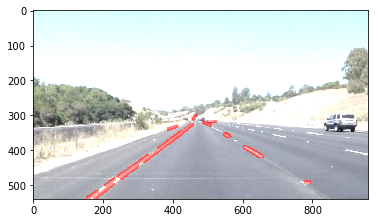

Which file do you want to process for lane lines detection.Enter [image] for images and [video] for videosimage
Choose image file from 1 to 6 or input your own file path4


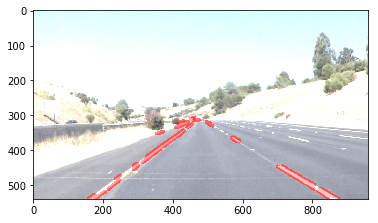

Which file do you want to process for lane lines detection.Enter [image] for images and [video] for videosimage
Choose image file from 1 to 6 or input your own file path5


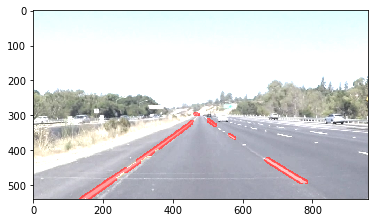

Which file do you want to process for lane lines detection.Enter [image] for images and [video] for videosimage
Choose image file from 1 to 6 or input your own file path6


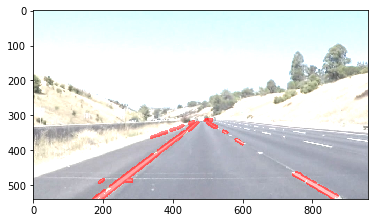

Which file do you want to process for lane lines detection.Enter [image] for images and [video] for videosvideo
Following Videos are available.
Video-Challenge(/Users/ameyr/OneDrive/Documents/GitHub/Lane_Lines_Detection/test_videos/challenge.mp4)
Video-Solid White Right(/Users/ameyr/OneDrive/Documents/GitHub/Lane_Lines_Detection/test_videos/solidWhiteRight.mp4)
Video-Solid Yellow Left(/Users/ameyr/OneDrive/Documents/GitHub/Lane_Lines_Detection/test_videos/solidYellowLeft.mp4)
Choose video in the following format in the form of input one,two,threeone
Which file do you want to process for lane lines detection.Enter [image] for images and [video] for videosvideo
Following Videos are available.
Video-Challenge(/Users/ameyr/OneDrive/Documents/GitHub/Lane_Lines_Detection/test_videos/challenge.mp4)
Video-Solid White Right(/Users/ameyr/OneDrive/Documents/GitHub/Lane_Lines_Detection/test_videos/solidWhiteRight.mp4)
Video-Solid Yellow Left(/Users/ameyr/OneDrive/Documents/GitHub/Lane_Lines_Detect

In [ ]:
main()# run the program